# Usage Example: Analysis csv-file

In [9]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import quickpbsa as pbsa

%matplotlib notebook

## Input file

In [10]:
tracefile = './Data/ExampleStack_difference.csv'
pd.read_csv(tracefile, header=1).loc[:5, :]

,id,x [nm],y [nm],sigma [nm],intensity [photon],center_pix,0,1,2,3,...,990,991,992,993,994,995,996,997,998,999
0,1,1323.97331,10382.87677,137.91881,1390.67689,6918,2108.054147,2057.048387,2130.452765,1888.403226,...,9.100230,10.105991,15.228111,19.173963,17.168203,7.199309,16.447005,15.807604,10.099078,15.387097
1,2,2973.21481,7682.14994,138.17243,694.57592,5135,976.176068,870.417094,814.810826,856.723077,...,-10.324786,-2.817094,-5.583476,-9.177208,-1.682621,-0.427920,5.531624,0.610826,-3.955556,1.502564
2,3,3123.68611,17095.39939,138.20926,1257.29196,11408,1868.709016,1885.335480,1773.676815,1892.166862,...,-4.848946,-2.997073,1.855386,-6.028103,-1.468384,-5.820843,1.923888,-0.889930,-0.092506,-12.531030
3,4,3074.09828,22629.48721,134.92371,1555.16189,15248,2285.798491,2220.134698,2240.531250,1943.405172,...,12.346444,10.218211,12.751616,8.892780,10.561961,7.872306,16.672953,18.081358,8.659483,5.337284
4,5,4014.61271,10108.24932,134.19890,1186.57157,6805,1818.690716,1789.437135,1822.765517,1850.262599,...,-0.469496,-2.966578,0.933687,1.658355,1.883820,-2.405836,2.565517,1.096552,2.436605,-0.356499
5,6,5736.30663,20352.34091,136.62630,1599.59023,13726,2314.493534,2388.341056,2336.439655,2337.733297,...,5.568427,5.265625,7.882004,9.359375,3.905711,7.251078,3.837823,5.430496,5.290948,5.197198


In the input file each row corresponds to one trace. It also contains a number of columns from the localization file that was used for trace extraction, but this is not neccessary for the analysis to work.

## Analysis

The entire analysis of the file can be accomplished with a single call to the function `pbsa_file`:

```python
KVthreshold = 100
maxiter = 100
pbsa.pbsa_file(file, KVthreshold, maxiter)
```

but this notebook uses lower level functions to explain the steps of the analysis one by one

### Preliminary Step Detection

First is the preliminary step detection, which produces 2 output files along with a log file.

In [24]:
KVthreshold = 100 # KV threshold (1/3 to 1/2 of typical last step)
KV_maxiter = 100   # Maximum KV iterations (much higher than expected number of steps)
kvout, kv_outfile, kv_jsonfile = pbsa.steps_preliminary.kv_file(tracefile, KVthreshold, KV_maxiter)
kvout.iloc[15:20,:15]

/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,id,x [nm],y [nm],sigma [nm],intensity [photon],center_pix,crop_index,kv_time [s],kv_iter,laststep,sdev_laststep,bg,sdev_bg,flag,type
15,4,3074.09828,22629.48721,134.92371,1555.16189,15248,316,0.101902,27,0,0,0,0,1,trace
16,4,3074.09828,22629.48721,134.92371,1555.16189,15248,316,0.101902,27,0,0,0,0,1,kv_mean
17,4,3074.09828,22629.48721,134.92371,1555.16189,15248,316,0.101902,27,0,0,0,0,1,kv_sdev
18,4,3074.09828,22629.48721,134.92371,1555.16189,15248,316,0.101902,27,0,0,0,0,1,fluors_intensity
19,4,3074.09828,22629.48721,134.92371,1555.16189,15248,316,0.101902,27,0,0,0,0,1,fluors_kv


## Filter Traces

[ 0  0  0  0  0  0  0  0 -3 -3  0  0  0  0  0  0 -6]


<IPython.core.display.Javascript object>


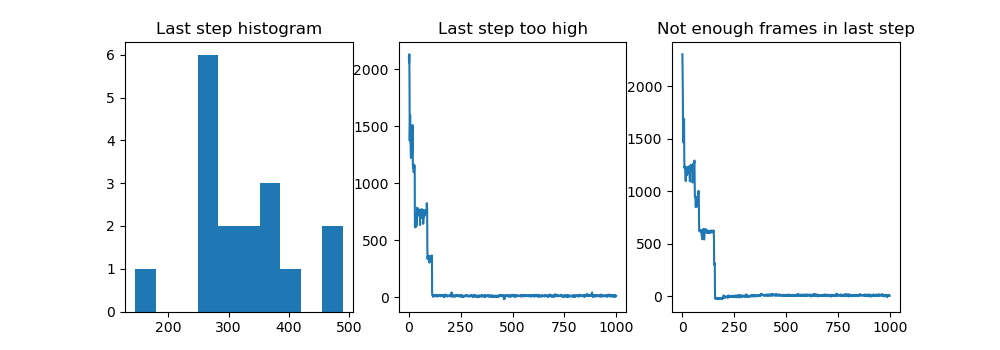

In [19]:
kvjson = json.load(open(kv_jsonfile))
kvresult = pd.read_csv(kv_outfile, header=1)
traces = np.array(kvresult.loc[kvresult['type']=='trace', '0':])

flags, avg_laststep, laststep, bg = pbsa.steps_refinement.generate_flags(kvjson, KVthreshold)
print(flags)

fig,ax=plt.subplots(1,3)
ax[0].hist(laststep)
ax[0].set_title('Last step histogram')
ax[1].plot(traces[0,:1000])
ax[1].set_title('Last step too high')
ax[2].plot(traces[16,:1000])
ax[2].set_title('Not enough frames in last step')
fig.set_size_inches(10,3.5)
plt.show()

## Refine PBSA Result

/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


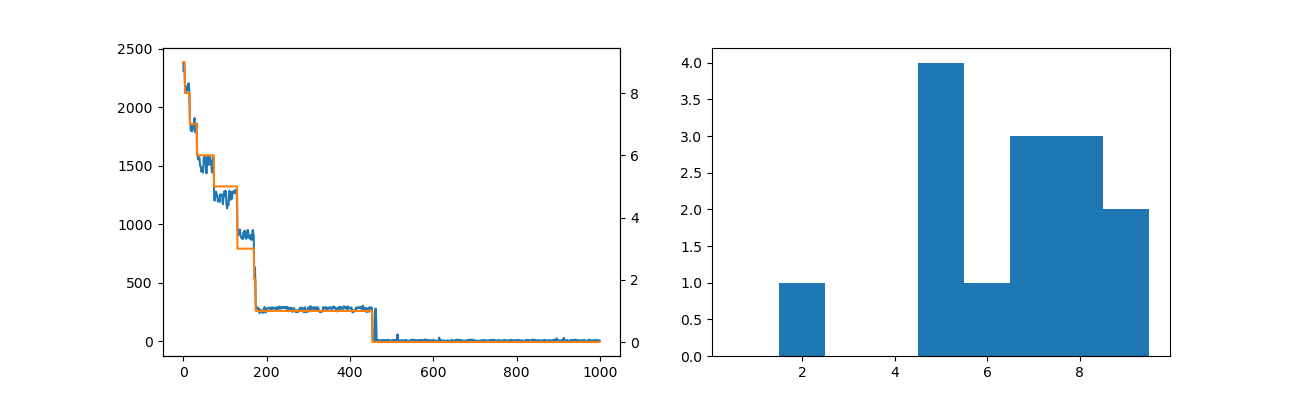

In [19]:
pbsa.steps_refinement.improve_steps_file(kv_outfile, kv_jsonfile)

result=pd.read_csv('./Data/ExampleStack_difference_result.csv',header=1)
# Filter flagged traces
result=result.loc[result['flag']==1,:]

traces=np.array(result.loc[result['type']=='trace','0':])
fluors_full=np.array(result.loc[result['type']=='fluors_full','0':])

fig,ax=plt.subplots(1,2)
ax[0].plot(traces[5,:1000])
ax1=ax[0].twinx()
ax1.plot(fluors_full[5,:1000],color='C1')

ax[1].hist(fluors_full[:,0],bins=np.arange(10)+0.5)
fig.set_size_inches([13,4])
plt.show()